# Ejercicio Procesamiento del Lenguaje Natural
## NLP - www.ApendeMachineLearning.com

## Analizaremos los cuentos del escritor Hernán Casciari

### Sus contenidos están en Español y son libres. (también puedes comprar sus libros)

Descargaremos los textos de su Blog con cuentos de humor de los años 2004 a 2015

Analizaremos su obra para ver comprender sobre lo que escribe y su evolución a lo largo del tiempo

Puedes visitar su blog y cuentos en hernancasciari.com

# Nuestra Agenda será
<ul><li>1 - Obtener datos</li>
    <li>2 - Cargar los datos</li>
    <li>3 - Limpiar datos </li>
    <li>4 - Analisis Exploratorio</li>
    <li>5 - Anáisis de Sentimiento</li>
    <li>6 - Modelado de Temáticas</li></ul>

In [1]:
# imports
import requests
from bs4 import BeautifulSoup
import pickle
from time import sleep

# 1 - Obtener los textos

In [2]:
def url_to_transcript(url):
    '''Obtener los enlaces del blog de Hernan Casciari.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    print('URL',url)
    enlaces = []
    for title in soup.find_all(class_="entry-title"):
        for a in title.find_all('a', href=True):
            print("Found link:", a['href'])
            enlaces.append(a['href'])
    sleep(0.75) #damos tiempo para que no nos penalice un firewall
    return enlaces

In [3]:
base = 'https://editorialorsai.com/category/epocas/'
urls = []
anios = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
for anio in anios:
    urls.append(base + anio + "/")
urls

['https://editorialorsai.com/category/epocas/2004/',
 'https://editorialorsai.com/category/epocas/2005/',
 'https://editorialorsai.com/category/epocas/2006/',
 'https://editorialorsai.com/category/epocas/2007/',
 'https://editorialorsai.com/category/epocas/2008/',
 'https://editorialorsai.com/category/epocas/2009/',
 'https://editorialorsai.com/category/epocas/2010/',
 'https://editorialorsai.com/category/epocas/2011/',
 'https://editorialorsai.com/category/epocas/2012/',
 'https://editorialorsai.com/category/epocas/2013/',
 'https://editorialorsai.com/category/epocas/2014/',
 'https://editorialorsai.com/category/epocas/2015/']

In [4]:
# Recorrer las URLs y obtener los enlaces
enlaces = [url_to_transcript(u) for u in urls]
print(enlaces)

URL https://editorialorsai.com/category/epocas/2004/
Found link: https://editorialorsai.com/el_viejo_folletin_y_las_nuevas_tecnologias/
Found link: https://editorialorsai.com/literatura_infantil/
Found link: https://editorialorsai.com/descubrimiento-del-miedo/
Found link: https://editorialorsai.com/buenos_aires/
Found link: https://editorialorsai.com/alrededor_de_mirta/
Found link: https://editorialorsai.com/la_sorpresa_de_lele/
Found link: https://editorialorsai.com/mis_conflictos_con_la_ciencia/
Found link: https://editorialorsai.com/al_colon_al_colon/
Found link: https://editorialorsai.com/como_se_combate_la_madurez/
Found link: https://editorialorsai.com/la_copula/
Found link: https://editorialorsai.com/el_hombre_solo/
Found link: https://editorialorsai.com/tecnicas_literarias/
Found link: https://editorialorsai.com/el_futuro_del_chape/
Found link: https://editorialorsai.com/la_siete_mares/
Found link: https://editorialorsai.com/la_fama_de_luis_gabriel_suchet/
Found link: https://e

URL https://editorialorsai.com/category/epocas/2006/
Found link: https://editorialorsai.com/algunos_casos_de_usurpacion_o_plagio_menor/
Found link: https://editorialorsai.com/la_frente_alta_la_frente_tersa/
Found link: https://editorialorsai.com/un_asadito_por_el_amor_de_dios/
Found link: https://editorialorsai.com/juan_y_el_dolor_de_muelas/
Found link: https://editorialorsai.com/los_justos/
Found link: https://editorialorsai.com/mahoma_los_paraguayos_y_la_crueldad/
Found link: https://editorialorsai.com/la_teoria_de_los_guinos/
Found link: https://editorialorsai.com/adelantados_eramos_los_de_antes/
Found link: https://editorialorsai.com/los_provinciales_del_loco/
Found link: https://editorialorsai.com/la_teoria_de_los_puntos_y_las_vueltas/
Found link: https://editorialorsai.com/y_que_mi_padre_me_perdone/
Found link: https://editorialorsai.com/deje_un_mensaje_despues_de_la_senal/
Found link: https://editorialorsai.com/nueva_teoria_sobre_los_horoscopos/
Found link: https://editorialorsa

URL https://editorialorsai.com/category/epocas/2011/
Found link: https://editorialorsai.com/ahora_confiamos_nosotros/
Found link: https://editorialorsai.com/el_fin_de_la_pirateria/
Found link: https://editorialorsai.com/hasta_agotar_stock/
Found link: https://editorialorsai.com/no_innovar/
Found link: https://editorialorsai.com/doce_pequenas_noticias/
Found link: https://editorialorsai.com/reuniones_privadas/
Found link: https://editorialorsai.com/silencio_estamos_trabajando/
Found link: https://editorialorsai.com/a_los_jovenes_de_ayer/
Found link: https://editorialorsai.com/no_cerramos_la_persiana/
Found link: https://editorialorsai.com/lechon/
Found link: https://editorialorsai.com/la_media_vuelta_parte_2/
Found link: https://editorialorsai.com/el_sumario_total/
Found link: https://editorialorsai.com/una_fiesta_muy_cool/
Found link: https://editorialorsai.com/excusas/
Found link: https://editorialorsai.com/otra_vez_gratis/
Found link: https://editorialorsai.com/un_clip/
Found link: h

[['https://editorialorsai.com/el_viejo_folletin_y_las_nuevas_tecnologias/', 'https://editorialorsai.com/literatura_infantil/', 'https://editorialorsai.com/descubrimiento-del-miedo/', 'https://editorialorsai.com/buenos_aires/', 'https://editorialorsai.com/alrededor_de_mirta/', 'https://editorialorsai.com/la_sorpresa_de_lele/', 'https://editorialorsai.com/mis_conflictos_con_la_ciencia/', 'https://editorialorsai.com/al_colon_al_colon/', 'https://editorialorsai.com/como_se_combate_la_madurez/', 'https://editorialorsai.com/la_copula/', 'https://editorialorsai.com/el_hombre_solo/', 'https://editorialorsai.com/tecnicas_literarias/', 'https://editorialorsai.com/el_futuro_del_chape/', 'https://editorialorsai.com/la_siete_mares/', 'https://editorialorsai.com/la_fama_de_luis_gabriel_suchet/', 'https://editorialorsai.com/nosotros_y_los_numeros_redondos/', 'https://editorialorsai.com/perder_el_colectivo/', 'https://editorialorsai.com/ni_olvido_ni_perdon/', 'https://editorialorsai.com/a_veces_el_cin

In [5]:
def url_get_text(url):
    '''Obtener los textos de los cuentos de Hernan Casciari.'''
    print('URL',url)
    text=""
    try:
        page = requests.get(url).text
        soup = BeautifulSoup(page, "lxml")
        text = [p.text for p in soup.find(class_="section-single-content").find_all('p')]
    except Exception:
        print('ERROR, puede que un firewall nos bloquea.')
        return ''
    sleep(0.75) #damos tiempo para que no nos penalice un firewall
    return text

In [6]:
# Recorrer las URLs y obtener los textos
MAX_POR_ANIO = 50 # para no saturar el server
textos=[]
for i in range(len(anios)):
    arts = enlaces[i]
    arts = arts[0:MAX_POR_ANIO]
    textos.append([url_get_text(u) for u in arts])
print(len(textos))

URL https://editorialorsai.com/el_viejo_folletin_y_las_nuevas_tecnologias/
URL https://editorialorsai.com/literatura_infantil/
URL https://editorialorsai.com/descubrimiento-del-miedo/
URL https://editorialorsai.com/buenos_aires/
URL https://editorialorsai.com/alrededor_de_mirta/
URL https://editorialorsai.com/la_sorpresa_de_lele/
URL https://editorialorsai.com/mis_conflictos_con_la_ciencia/
URL https://editorialorsai.com/al_colon_al_colon/
URL https://editorialorsai.com/como_se_combate_la_madurez/
URL https://editorialorsai.com/la_copula/
URL https://editorialorsai.com/el_hombre_solo/
URL https://editorialorsai.com/tecnicas_literarias/
URL https://editorialorsai.com/el_futuro_del_chape/
URL https://editorialorsai.com/la_siete_mares/
URL https://editorialorsai.com/la_fama_de_luis_gabriel_suchet/
URL https://editorialorsai.com/nosotros_y_los_numeros_redondos/
URL https://editorialorsai.com/perder_el_colectivo/
URL https://editorialorsai.com/ni_olvido_ni_perdon/
URL https://editorialorsai

URL https://editorialorsai.com/disculpe_me_dice_donde_hay_un_quiosco/
URL https://editorialorsai.com/prelactancia_divino_tesoro/
URL https://editorialorsai.com/encuentro_con_un_caradeforme/
URL https://editorialorsai.com/que-es-de-tu-vida/
URL https://editorialorsai.com/tres_anos_despues/
URL https://editorialorsai.com/los_quienes_y_los_porque/
URL https://editorialorsai.com/el_tajo_de_un_cuchillo_en_el_abdomen/
URL https://editorialorsai.com/la-loca-raquel/
URL https://editorialorsai.com/primer_asalto/
URL https://editorialorsai.com/de_mogolicos_gallegos_y_demas_gentilicios/
URL https://editorialorsai.com/canelones/
URL https://editorialorsai.com/bromas-telefonicas/
URL https://editorialorsai.com/la_persecucion_de_las_viejas_y_demas_cuestiones/
URL https://editorialorsai.com/seis_meses_haciendome_el_loco/
URL https://editorialorsai.com/negro/
URL https://editorialorsai.com/el_ultimo_hombre_bueno_de_la_lista/
URL https://editorialorsai.com/los_cuatro_albaniles/
URL https://editorialors

URL https://editorialorsai.com/si_fuera_cocaina_seria_mas_facil/
URL https://editorialorsai.com/la_historieta_imposible/
URL https://editorialorsai.com/siete_apostillas/
URL https://editorialorsai.com/extrapolable/
URL https://editorialorsai.com/nuevo_blog_de_chiri/
URL https://editorialorsai.com/los-nuevos-intentos/
URL https://editorialorsai.com/valor_y_precio/
URL https://editorialorsai.com/la_cultura_es_libre/
URL https://editorialorsai.com/negar_todo/
URL https://editorialorsai.com/liberen_los_libros/
URL https://editorialorsai.com/dos_de_abril/
URL https://editorialorsai.com/quatro_historias/
URL https://editorialorsai.com/monica_pasion/
URL https://editorialorsai.com/bienvenidos/
URL https://editorialorsai.com/caretas/
URL https://editorialorsai.com/messi_es_un_perro/
URL https://editorialorsai.com/los_jefes_los_empleados/
URL https://editorialorsai.com/el-alma-de-las-fiestas/
URL https://editorialorsai.com/algo_para_recordar/
URL https://editorialorsai.com/mic/
URL https://edit

In [7]:
#Probamos a ver alguno de los textos
print(len(textos[0]))
print(textos[0])

50
[['Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácora (una herramienta de publicación cronológica de contenidos en internet) para contar una historia costumbrista desde la subjetiva de un ama de casa argentina de clase media. La repercusión del proyecto fue tan asombrosa que me gustaría compartir algunos detalles con el lector.', 'La idea nació como un juego en el que intenté hacer un pequeño homenaje a mi ciudad natal, Mercedes, o al menos sentirme cerca de su gente; increíblemente, y a pesar de la enorme cantidad de lectores de otos países que se interesaron por la historia, su desarrollo nunca perdió del todo esa mínima premisa. Ese logro, por supuesto, no fue mío sino de los comentaristas y seguidores del relato.', 'Durante todo el proceso quise generar la ilusión de que la protagonista de la historia —Mirta Bertotti— escribía realmente un diario personal, ayudada en la parte técnica

In [8]:
# # Pickle files para usar luego

# # Creamos un directorio y nombramos los archivos por año
!mkdir blog

for i, c in enumerate(anios):
    with open("blog/" + c + ".txt", "wb") as file:
        cad=""
        for texto in textos[i]:
            for texto0 in texto:
                cad=cad + texto0
        pickle.dump(cad, file)

# 2 - Cargar los Datos

In [9]:
import pickle

# Cargamos los pickled files
anios = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
data = {}
for i, c in enumerate(anios):
    with open("blog/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [10]:
# Revisamos que se haya guardado bien
data.keys()

dict_keys(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'])

In [11]:
# Veamos algun trozo de texto
data['2008'][1000:1222]

' que esos apodos son estándares. Sólo las visitas reconocen el fallo:—Dejá la campera y el portafolio en el rincón blanco —le decía yo a mis amigos cuando venían a tomar la leche.—¿A dónde?—Ahí, en el rincón blanco —y seña'

In [12]:
# checkeamos primer clave
next(iter(data.keys()))

'2004'

In [13]:
# nuestro diccionario esta cómo clave:Año valor:texto
next(iter(data.values()))

'Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácora (una herramienta de publicación cronológica de contenidos en internet) para contar una historia costumbrista desde la subjetiva de un ama de casa argentina de clase media. La repercusión del proyecto fue tan asombrosa que me gustaría compartir algunos detalles con el lector.La idea nació como un juego en el que intenté hacer un pequeño homenaje a mi ciudad natal, Mercedes, o al menos sentirme cerca de su gente; increíblemente, y a pesar de la enorme cantidad de lectores de otos países que se interesaron por la historia, su desarrollo nunca perdió del todo esa mínima premisa. Ese logro, por supuesto, no fue mío sino de los comentaristas y seguidores del relato.Durante todo el proceso quise generar la ilusión de que la protagonista de la historia —Mirta Bertotti— escribía realmente un diario personal, ayudada en la parte técnica por un supue

In [14]:
# lo combinamos
data_combined = {key: [value] for (key, value) in data.items()}

In [15]:
# lo metemos en un Panda's dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
2004,"Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácor..."
2005,"Nunca en la puta vida me hubiera imaginado que el diario, siempre plagado de maremotos y de incendios de discotecas, pudiera traer alguna vez una ..."
2006,"Más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros, o no firmados pero sí apro..."
2007,"Desde hace días la Nina quiere interactuar conmigo. Todavía es prematuro decir que intenta tener una relación estable, pero ya empiezo a oír los e..."
2008,"De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi olfato reco..."
2009,"Google ha lanzado esta semana Latitude, un servicio gratuito que permite ubicar -mediante el celular- a los contactos de la agenda que den su cons..."
2010,"Leo en la prensa económica que, entre las varias empresas que tienen pensado salir a bolsa este año, se encuentra Polaroid, y me sorprende leer el..."
2011,"Esto pasó ayer: Chichita caminaba por una playa desierta, en Mar Azul, costa atlántica argentina, con su revista y su sombrilla, y unos chicos dij..."
2012,"Escribo esto justo cuando el contador llega a dos mil. Por lo tanto, mantenemos el ritmo a pesar de los días de turrones y petardos. Mientras nace..."
2013,"Menos de once segundos antes, cuando el jugador argentino recibe el pase de un compañero, el reloj en México marca las trece horas, doce minutos y..."


In [16]:
# Veamos uno de los contenidos
data_df.transcript.loc['2007']

'Desde hace días la Nina quiere interactuar conmigo. Todavía es prematuro decir que intenta tener una relación estable, pero ya empiezo a oír los engranajes de su cabeza que se acomodan, se aceitan y crujen. Nexos coordinantes que aparecen de la nada, sustantivos nuevos, adjetivos precisos. Sus ojos, de repente, prestan atención a las palabras y a las formas. No hay prodigio: está en la edad. Ella parece preparada para dar el siguiente paso en su relación padre-hija. El que está cagado en las patas soy yo.El cerebro de la Nina, a punto de cumplir tres años, es una alfombra hambrienta que lo absorbe todo. Cada cosa es un elemento nuevo que puede servir para algo: no importa que sea una canción, un escarabajo muerto en la arena, un ruido seco, el número ocho, el perfil de Julio Iglesias, la pelusa del ombligo, un pedacito de cinta scotch, mierda de perro en la vereda o un billete de cien euros. Todo tiene la misma importancia potencial. Todo brilla y es, para ella, alucinante y comestibl

# 3 - Limpiar los Datos

In [17]:
# Aplicaremos varios rounds de limpieza
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [18]:
# vemos la primer limpieza
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
2004,ayer di por finalizada la primera etapa de un experimento de ficción llamado más respeto que soy tu madre en el que usé el recurso de la bitácor...
2005,nunca en la puta vida me hubiera imaginado que el diario siempre plagado de maremotos y de incendios de discotecas pudiera traer alguna vez una ...
2006,más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros o no firmados pero sí apro...
2007,desde hace días la nina quiere interactuar conmigo todavía es prematuro decir que intenta tener una relación estable pero ya empiezo a oír los e...
2008,de pronto yo estaba en el hogar donde pasé la infancia lo supo primero mi nariz los ojos se acostumbran tarde a la penumbra pero mi olfato reco...
2009,google ha lanzado esta semana latitude un servicio gratuito que permite ubicar mediante el celular a los contactos de la agenda que den su cons...
2010,leo en la prensa económica que entre las varias empresas que tienen pensado salir a bolsa este año se encuentra polaroid y me sorprende leer el...
2011,esto pasó ayer chichita caminaba por una playa desierta en mar azul costa atlántica argentina con su revista y su sombrilla y unos chicos dij...
2012,escribo esto justo cuando el contador llega a dos mil por lo tanto mantenemos el ritmo a pesar de los días de turrones y petardos mientras nace...
2013,menos de once segundos antes cuando el jugador argentino recibe el pase de un compañero el reloj en méxico marca las trece horas doce minutos y...


In [19]:
# Segundo round
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [20]:
# veamos como queda
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
2004,ayer di por finalizada la primera etapa de un experimento de ficción llamado más respeto que soy tu madre en el que usé el recurso de la bitácor...
2005,nunca en la puta vida me hubiera imaginado que el diario siempre plagado de maremotos y de incendios de discotecas pudiera traer alguna vez una ...
2006,más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros o no firmados pero sí apro...
2007,desde hace días la nina quiere interactuar conmigo todavía es prematuro decir que intenta tener una relación estable pero ya empiezo a oír los e...
2008,de pronto yo estaba en el hogar donde pasé la infancia lo supo primero mi nariz los ojos se acostumbran tarde a la penumbra pero mi olfato reco...
2009,google ha lanzado esta semana latitude un servicio gratuito que permite ubicar mediante el celular a los contactos de la agenda que den su cons...
2010,leo en la prensa económica que entre las varias empresas que tienen pensado salir a bolsa este año se encuentra polaroid y me sorprende leer el...
2011,esto pasó ayer chichita caminaba por una playa desierta en mar azul costa atlántica argentina con su revista y su sombrilla y unos chicos dij...
2012,escribo esto justo cuando el contador llega a dos mil por lo tanto mantenemos el ritmo a pesar de los días de turrones y petardos mientras nace...
2013,menos de once segundos antes cuando el jugador argentino recibe el pase de un compañero el reloj en méxico marca las trece horas doce minutos y...


In [21]:
# Let's take a look at our dataframe
#data_df

In [22]:
# Como no tenemos un Lemmatizer en español, hacemos manualmente algunas conversiones
# OJO: esto realmente no se hace a mano!!!

def detectadas(palabra):
    eliminar_s = ('libreros','textos','papelitos','monedas','páginas','anécdotas','perros','cuadernos','blogs',
                  'revistas','caballos','vecinos','madres','puntos','ricos','libros')
    if palabra in eliminar_s :
        return palabra[:-1]
    eliminar_es = ('mundiales','lectores','campeones','maníes','ustedes','autores')
    if palabra in eliminar_es:
        return palabra[:-2]
    return palabra

def clean_text_round3(text):
    '''.'''
    return " ".join([detectadas(word) for word in text.split()])
    
round3 = lambda x: clean_text_round3(x)

In [23]:
#vemos como queda
data_clean = pd.DataFrame(data_clean.transcript.apply(round3))
data_clean

,transcript
2004,ayer di por finalizada la primera etapa de un experimento de ficción llamado más respeto que soy tu madre en el que usé el recurso de la bitácora ...
2005,nunca en la puta vida me hubiera imaginado que el diario siempre plagado de maremotos y de incendios de discotecas pudiera traer alguna vez una bu...
2006,más o menos una vez por semana recibo correos de lector que me informan que han visto texto míos firmados por otros o no firmados pero sí apropiad...
2007,desde hace días la nina quiere interactuar conmigo todavía es prematuro decir que intenta tener una relación estable pero ya empiezo a oír los eng...
2008,de pronto yo estaba en el hogar donde pasé la infancia lo supo primero mi nariz los ojos se acostumbran tarde a la penumbra pero mi olfato reconoc...
2009,google ha lanzado esta semana latitude un servicio gratuito que permite ubicar mediante el celular a los contactos de la agenda que den su consent...
2010,leo en la prensa económica que entre las varias empresas que tienen pensado salir a bolsa este año se encuentra polaroid y me sorprende leer el no...
2011,esto pasó ayer chichita caminaba por una playa desierta en mar azul costa atlántica argentina con su revista y su sombrilla y unos chicos dijeron ...
2012,escribo esto justo cuando el contador llega a dos mil por lo tanto mantenemos el ritmo a pesar de los días de turrones y petardos mientras nace el...
2013,menos de once segundos antes cuando el jugador argentino recibe el pase de un compañero el reloj en méxico marca las trece horas doce minutos y ve...


In [24]:
# Esto es un nuevo campo por si quisieramos agregar alguna info adicional a cada año
# Nuestro caso repetimos los años, nos servirá para alguna visualización
full_names = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

data_df['full_name'] = full_names
data_df

,transcript,full_name
2004,"Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácor...",2004
2005,"Nunca en la puta vida me hubiera imaginado que el diario, siempre plagado de maremotos y de incendios de discotecas, pudiera traer alguna vez una ...",2005
2006,"Más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros, o no firmados pero sí apro...",2006
2007,"Desde hace días la Nina quiere interactuar conmigo. Todavía es prematuro decir que intenta tener una relación estable, pero ya empiezo a oír los e...",2007
2008,"De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi olfato reco...",2008
2009,"Google ha lanzado esta semana Latitude, un servicio gratuito que permite ubicar -mediante el celular- a los contactos de la agenda que den su cons...",2009
2010,"Leo en la prensa económica que, entre las varias empresas que tienen pensado salir a bolsa este año, se encuentra Polaroid, y me sorprende leer el...",2010
2011,"Esto pasó ayer: Chichita caminaba por una playa desierta, en Mar Azul, costa atlántica argentina, con su revista y su sombrilla, y unos chicos dij...",2011
2012,"Escribo esto justo cuando el contador llega a dos mil. Por lo tanto, mantenemos el ritmo a pesar de los días de turrones y petardos. Mientras nace...",2012
2013,"Menos de once segundos antes, cuando el jugador argentino recibe el pase de un compañero, el reloj en México marca las trece horas, doce minutos y...",2013


In [25]:
# Hacemos el pickle para usar más adelante
data_df.to_pickle("corpus.pkl")

In [26]:
data_clean.transcript[0:255]

2004    ayer di por finalizada la primera etapa de un experimento de ficción llamado más respeto que soy tu madre en el que usé el recurso de la bitácora ...
2005    nunca en la puta vida me hubiera imaginado que el diario siempre plagado de maremotos y de incendios de discotecas pudiera traer alguna vez una bu...
2006    más o menos una vez por semana recibo correos de lector que me informan que han visto texto míos firmados por otros o no firmados pero sí apropiad...
2007    desde hace días la nina quiere interactuar conmigo todavía es prematuro decir que intenta tener una relación estable pero ya empiezo a oír los eng...
2008    de pronto yo estaba en el hogar donde pasé la infancia lo supo primero mi nariz los ojos se acostumbran tarde a la penumbra pero mi olfato reconoc...
2009    google ha lanzado esta semana latitude un servicio gratuito que permite ubicar mediante el celular a los contactos de la agenda que den su consent...
2010    leo en la prensa económica que entre las var

In [27]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common Spanish stop words
from sklearn.feature_extraction.text import CountVectorizer

with open('spanish.txt') as f:
    lines = f.read().splitlines()

cv = CountVectorizer(stop_words=lines)
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abajo,abananados,abandonaba,abandonado,abandonar,abandonaron,abandoné,abandonó,abanico,abaraja,...,único,únicos,útero,útil,útiles,útimo,českomoravský,české,šeredova,šeredovà
2004,10,0,1,1,0,0,0,0,0,0,...,11,0,0,3,0,1,0,0,0,0
2005,15,0,0,0,0,1,0,0,0,0,...,16,0,3,3,0,0,0,0,0,0
2006,4,0,0,0,0,0,0,0,0,0,...,13,1,0,2,0,0,0,0,0,0
2007,9,0,0,0,1,0,0,0,0,0,...,9,0,0,1,0,0,0,0,0,0
2008,9,0,0,0,0,1,0,1,0,0,...,15,0,0,5,0,0,1,1,1,2
2009,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,2,0,0,0,0,0
2010,8,0,0,0,2,0,0,0,0,0,...,9,0,0,2,0,0,0,0,0,0
2011,7,0,0,0,0,0,0,0,0,0,...,16,4,0,1,0,0,0,0,0,0
2012,8,0,1,0,0,0,0,0,0,1,...,7,1,0,1,0,0,0,0,0,0
2013,0,0,0,0,0,0,0,0,1,0,...,6,1,0,0,0,0,0,0,0,0


In [28]:
# Lo guardamos como pickle
data_dtm.to_pickle("dtm.pkl")

In [29]:
# Lo guardamos como pickle también
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# 4 - Análisis Exploratorio

In [30]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
abajo,10,15,4,9,9,0,8,7,8,0,13,6
abananados,0,0,0,0,0,0,0,0,0,0,1,0
abandonaba,1,0,0,0,0,0,0,0,1,0,0,0
abandonado,1,0,0,0,0,0,0,0,0,0,0,0
abandonar,0,0,0,1,0,0,2,0,0,0,0,0


In [31]:
# Find the top 30 words (per Year)
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'2004': [('si', 147),
  ('alex', 103),
  ('vez', 98),
  ('lucas', 87),
  ('cada', 68),
  ('dos', 63),
  ('ahora', 63),
  ('ser', 62),
  ('después', 61),
  ('casa', 58),
  ('años', 57),
  ('siempre', 55),
  ('nadie', 52),
  ('ver', 51),
  ('mundo', 51),
  ('vida', 51),
  ('hace', 50),
  ('cosas', 49),
  ('bien', 49),
  ('tres', 48),
  ('día', 47),
  ('nunca', 47),
  ('así', 44),
  ('tan', 43),
  ('noche', 40),
  ('mejor', 39),
  ('mismo', 37),
  ('hacer', 36),
  ('dijo', 36),
  ('cabeza', 36)],
 '2005': [('si', 248),
  ('dos', 138),
  ('vez', 130),
  ('años', 118),
  ('siempre', 107),
  ('ser', 103),
  ('vida', 95),
  ('tiempo', 93),
  ('hace', 92),
  ('ahora', 91),
  ('entonces', 91),
  ('mundo', 85),
  ('dice', 83),
  ('después', 83),
  ('cada', 80),
  ('casa', 78),
  ('gente', 75),
  ('día', 73),
  ('mismo', 73),
  ('nunca', 70),
  ('noche', 69),
  ('lucas', 67),
  ('tarde', 66),
  ('cosas', 65),
  ('hacer', 65),
  ('veces', 64),
  ('ver', 63),
  ('va', 62),
  ('bien', 61),
  ('así'

In [32]:
# Print the top 15 words p/Year
for anio, top_words in top_dict.items():
    print(anio)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

2004
si, alex, vez, lucas, cada, dos, ahora, ser, después, casa, años, siempre, nadie, ver
---
2005
si, dos, vez, años, siempre, ser, vida, tiempo, hace, ahora, entonces, mundo, dice, después
---
2006
si, años, dos, vez, siempre, hace, mundo, ser, ahora, entonces, cada, mismo, vida, casa
---
2007
si, siempre, dos, entonces, años, vez, nunca, sólo, ahora, después, mundo, ser, casa, vida
---
2008
dos, si, años, casa, vez, ahora, después, siempre, entonces, hace, ser, tarde, libro, mismo
---
2009
años, si, ahora, casa, vez, después, andrés, dos, ser, hace, libro, vida, entonces, tres
---
2010
revista, chiri, si, años, orsai, lector, cada, hacer, dos, ahora, librero, ser, hace, vez
---
2011
revista, orsai, lector, número, dos, si, vez, chiri, años, ahora, cada, hace, siempre, libro
---
2012
orsai, revista, dos, cada, si, vez, lector, dijo, chiri, ahora, después, tiempo, mismo, hace
---
2013
si, dos, años, papelito, libro, cada, dijo, ve, después, ahora, vez, nunca, tres, tarde
---
2014
si,

In [33]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each anio
words = []
for anio in data.columns:
    top = [word for (word, count) in top_dict[anio]]
    for t in top:
        words.append(t)
        
words

['si',
 'alex',
 'vez',
 'lucas',
 'cada',
 'dos',
 'ahora',
 'ser',
 'después',
 'casa',
 'años',
 'siempre',
 'nadie',
 'ver',
 'mundo',
 'vida',
 'hace',
 'cosas',
 'bien',
 'tres',
 'día',
 'nunca',
 'así',
 'tan',
 'noche',
 'mejor',
 'mismo',
 'hacer',
 'dijo',
 'cabeza',
 'si',
 'dos',
 'vez',
 'años',
 'siempre',
 'ser',
 'vida',
 'tiempo',
 'hace',
 'ahora',
 'entonces',
 'mundo',
 'dice',
 'después',
 'cada',
 'casa',
 'gente',
 'día',
 'mismo',
 'nunca',
 'noche',
 'lucas',
 'tarde',
 'cosas',
 'hacer',
 'veces',
 'ver',
 'va',
 'bien',
 'así',
 'si',
 'años',
 'dos',
 'vez',
 'siempre',
 'hace',
 'mundo',
 'ser',
 'ahora',
 'entonces',
 'cada',
 'mismo',
 'vida',
 'casa',
 'tiempo',
 'después',
 'día',
 'primera',
 'gente',
 'hacer',
 'sólo',
 'cosas',
 'decir',
 'bien',
 'nadie',
 'nunca',
 'menos',
 'hombre',
 'casi',
 'así',
 'si',
 'siempre',
 'dos',
 'entonces',
 'años',
 'vez',
 'nunca',
 'sólo',
 'ahora',
 'después',
 'mundo',
 'ser',
 'casa',
 'vida',
 'mujer',
 'ti

In [34]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('si', 12),
 ('vez', 12),
 ('cada', 12),
 ('dos', 12),
 ('ahora', 12),
 ('después', 12),
 ('años', 12),
 ('hace', 12),
 ('casa', 11),
 ('nunca', 11),
 ('siempre', 10),
 ('mundo', 10),
 ('día', 10),
 ('mismo', 10),
 ('hacer', 10),
 ('ser', 9),
 ('entonces', 9),
 ('chiri', 9),
 ('vida', 8),
 ('tiempo', 8),
 ('libro', 8),
 ('tres', 7),
 ('dijo', 7),
 ('bien', 6),
 ('noche', 6),
 ('cosas', 5),
 ('así', 5),
 ('gente', 5),
 ('tarde', 5),
 ('nadie', 4),
 ('veces', 4),
 ('orsai', 4),
 ('lucas', 3),
 ('ver', 3),
 ('menos', 3),
 ('revista', 3),
 ('lector', 3),
 ('número', 3),
 ('alex', 2),
 ('tan', 2),
 ('mejor', 2),
 ('dice', 2),
 ('primera', 2),
 ('sólo', 2),
 ('decir', 2),
 ('hombre', 2),
 ('argentino', 2),
 ('usted', 2),
 ('semana', 2),
 ('texto', 2),
 ('cuatro', 2),
 ('solo', 2),
 ('mundial', 2),
 ('cabeza', 1),
 ('va', 1),
 ('casi', 1),
 ('mujer', 1),
 ('madre', 1),
 ('andrés', 1),
 ('gelós', 1),
 ('pablo', 1),
 ('sido', 1),
 ('librero', 1),
 ('diez', 1),
 ('medio', 1),
 ('proyecto', 1),


In [35]:
# Las mas repetidas las descartaremos
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['si',
 'vez',
 'cada',
 'dos',
 'ahora',
 'después',
 'años',
 'hace',
 'casa',
 'nunca',
 'siempre',
 'mundo',
 'día',
 'mismo',
 'hacer',
 'ser',
 'entonces',
 'chiri',
 'vida',
 'tiempo',
 'libro',
 'tres',
 'dijo']

In [37]:
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/home/administrador/git/python/tp_ds_up_01/blog' 
wordlists = PlaintextCorpusReader(corpus_root, '.*', encoding='latin-1')
#wordlists.fileids()
#pals = wordlists.words('2004.txt')

cfd = nltk.ConditionalFreqDist(
        (word,genre)
        for genre in anios
        for w in wordlists.words(genre + '.txt')
        for word in ['casa','mundo','tiempo','vida']
        if w.lower().startswith(word) )
cfd.plot()

<Figure size 640x480 with 1 Axes>

In [38]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
with open('spanish.txt') as f:
    stop_words = f.read().splitlines()
for pal in add_stop_words:
    stop_words.append(pal)
more_stop_words=['alex','andrés','asi','andres','así','año','alejandro','alfonso','allí','alguien',
                 'basdala','bernardo','bien',
                 'cosa','cosas','costoya','costa','cinco','celoni','cuatro','cómo','casi','colo','caprio','českomoravský','české','costa','canoso','carla','comequechu',
                 'dos','dice','decir','días','dije','digo','diez',
                 'ésa', 'ésas', 'ése', 'ésos', 'ésta', 'éstas', 'éste', 'ésto', 'éstos',
                 'fernando','fenwick',
                 'gelós','gente',
                 'hornby','hernan','hernán','hoy','horacio','horas','hará','hans','hacía','haber',
                 'iveta',
                 'jesús','jorge','juan',
                 'karen',
                 'lucas','luego', 'luis',
                 'mirta','mientras','menos','mónica','medio','mil','moncho','momento','mañana','mejor',
                 'narcís','número','noche','nadie',
                 'ojos',
                 'primer','primera','pase','pablo','pepe','pack','peter', 'pues','prieto','politto','pol','paola','puede','próximo','podrán','podía',
                 'quizá','quizás','quince','quién','quiero',
                 'rato',
                 'sólo','solamente','sakhan','šeredova','seis','šeredovà','seselovsky','solo','salas','sant','sino','se','sé','sabés','semana','soto','sido','solamente',
                 'tres','tan','todas','trece','toda','todavía','tarde','tener',
                 'uno','usted',
                 'veces','ver','ve','vos','va','voy',
                 'waiser','woung'
                ]
for pal in more_stop_words:
    stop_words.append(pal)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [39]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

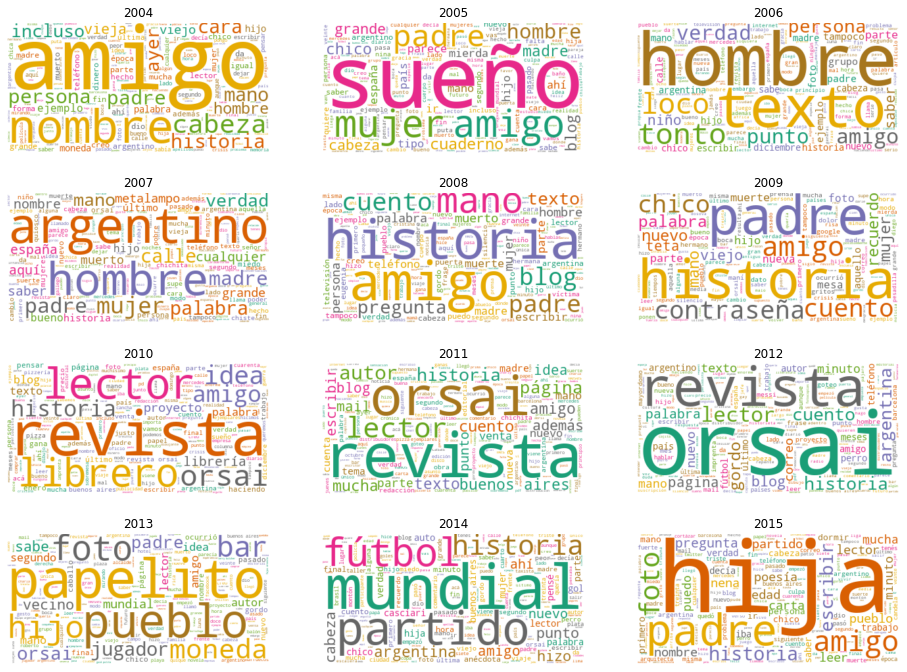

In [40]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,12]

anios = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

# Create subplots for each anio
for index, anio in enumerate(data.columns):
    wc.generate(data_clean.transcript[anio])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(anios[index])
    
plt.show()

In [42]:
# Find the number of unique words per Year

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for anio in data.columns:
    uniques = data[anio].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(anios, unique_list)), columns=['Anio', 'unique_words'])
#data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort = data_words # sin ordenar
data_unique_sort

/home/administrador/anaconda3/envs/tp-ds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


,Anio,unique_words
0,2004,6534
1,2005,8801
2,2006,8134
3,2007,7145
4,2008,8983
5,2009,3492
6,2010,4740
7,2011,6830
8,2012,4212
9,2013,4582


In [43]:
# ejecuta este si hicimos el webscrapping, o no tenemos los valores en la variable
posts_per_year=[]
try:
  enlaces
except NameError:
  # Si no hice, los tengo hardcodeados:
    posts_per_year = [50, 27, 18, 50, 42, 22, 50, 33, 31, 17, 33, 13]
else:
    for i in range(len(anios)):
        arts = enlaces[i]
        #arts = arts[0:10] #limito a maximo 10 por año
        print(anios[i],len(arts))
        posts_per_year.append(min(len(arts),MAX_POR_ANIO))

2004 107
2005 50
2006 31
2007 33
2008 33
2009 18
2010 17
2011 51
2012 27
2013 13
2014 42
2015 22


In [44]:
# Calculate the words per post of each Year

# Find the total number of words per Year
total_list = []
for anio in data.columns:
    totals = sum(data[anio])
    total_list.append(totals)
    
# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['posts_per_year'] = posts_per_year
data_words['words_per_posts'] = data_words['total_words'] / data_words['posts_per_year']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
#data_wpm_sort = data_words.sort_values(by='words_per_posts')
data_wpm_sort = data_words #sin ordenar
data_wpm_sort

,Anio,unique_words,total_words,posts_per_year,words_per_posts
0,2004,6534,16496,50,329.920000
1,2005,8801,26885,50,537.700000
2,2006,8134,22214,31,716.580645
3,2007,7145,18462,33,559.454545
4,2008,8983,27276,33,826.545455
5,2009,3492,7254,18,403.000000
6,2010,4740,12930,17,760.588235
7,2011,6830,21208,50,424.160000
8,2012,4212,9840,27,364.444444
9,2013,4582,11695,13,899.615385


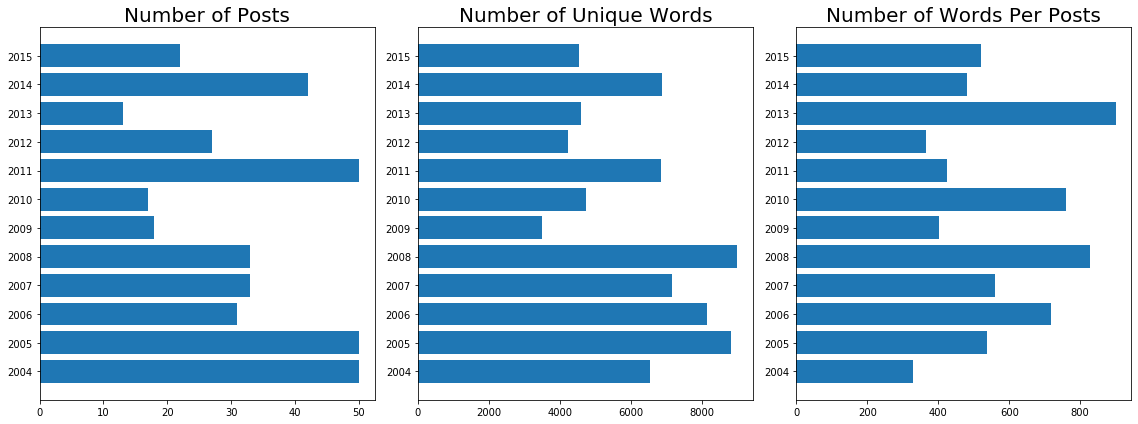

In [45]:
# Let's plot our findings
import numpy as np
plt.rcParams['figure.figsize'] = [16, 6]

y_pos = np.arange(len(data_words))

plt.subplot(1, 3, 1)
plt.barh(y_pos,posts_per_year, align='center')
plt.yticks(y_pos, anios)
plt.title('Number of Posts', fontsize=20)


plt.subplot(1, 3, 2)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.Anio)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 3, 3)
plt.barh(y_pos, data_wpm_sort.words_per_posts, align='center')
plt.yticks(y_pos, data_wpm_sort.Anio)
plt.title('Number of Words Per Posts', fontsize=20)

plt.tight_layout()
plt.show()

# 5 - Análisis de Sentimiento

In [46]:
# Leeremos el corpus que aún preserva el orden de las palabras
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
2004,"Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácor...",2004
2005,"Nunca en la puta vida me hubiera imaginado que el diario, siempre plagado de maremotos y de incendios de discotecas, pudiera traer alguna vez una ...",2005
2006,"Más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros, o no firmados pero sí apro...",2006
2007,"Desde hace días la Nina quiere interactuar conmigo. Todavía es prematuro decir que intenta tener una relación estable, pero ya empiezo a oír los e...",2007
2008,"De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi olfato reco...",2008
2009,"Google ha lanzado esta semana Latitude, un servicio gratuito que permite ubicar -mediante el celular- a los contactos de la agenda que den su cons...",2009
2010,"Leo en la prensa económica que, entre las varias empresas que tienen pensado salir a bolsa este año, se encuentra Polaroid, y me sorprende leer el...",2010
2011,"Esto pasó ayer: Chichita caminaba por una playa desierta, en Mar Azul, costa atlántica argentina, con su revista y su sombrilla, y unos chicos dij...",2011
2012,"Escribo esto justo cuando el contador llega a dos mil. Por lo tanto, mantenemos el ritmo a pesar de los días de turrones y petardos. Mientras nace...",2012
2013,"Menos de once segundos antes, cuando el jugador argentino recibe el pase de un compañero, el reloj en México marca las trece horas, doce minutos y...",2013


In [48]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob
    
pol = lambda x: TextBlob(x).sentiment.polarity
pol2 = lambda x: x.sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
sub2 = lambda x: x.sentiment.subjectivity

# Realmente lo traducimos al inglés pues el analisis de sentimiento de TextBlob no funciona en Español :(
traducir = lambda x: TextBlob(x).translate(to="en")

data['blob_en'] = data['transcript'].apply(traducir)
data['polarity'] = data['blob_en'].apply(pol2)
data['subjectivity'] = data['blob_en'].apply(sub2)
data

,transcript,full_name,blob_en,polarity,subjectivity
2004,"Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácor...",2004,"(Y, e, s, t, e, r, d, a, y, , I, , f, i, n, i, s, h, e, d, , t, h, e, , f, i, r, s, t, , s, t, a, g, e, , o, f, , a, , f, i, c, t, i, o, n...",0.084720,0.498135
2005,"Nunca en la puta vida me hubiera imaginado que el diario, siempre plagado de maremotos y de incendios de discotecas, pudiera traer alguna vez una ...",2005,"(N, e, v, e, r, , i, n, , t, h, e, , f, u, c, k, i, n, g, , l, i, f, e, , w, o, u, l, d, , I, , h, a, v, e, , i, m, a, g, i, n, e, d, , t...",0.029469,0.490039
2006,"Más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros, o no firmados pero sí apro...",2006,"(A, b, o, u, t, , o, n, c, e, , a, , w, e, e, k, , I, , r, e, c, e, i, v, e, , e, m, a, i, l, s, , f, r, o, m, , r, e, a, d, e, r, s, , w...",0.036573,0.483450
2007,"Desde hace días la Nina quiere interactuar conmigo. Todavía es prematuro decir que intenta tener una relación estable, pero ya empiezo a oír los e...",2007,"(F, o, r, , d, a, y, s, , t, h, e, , N, i, n, a, , w, a, n, t, s, , t, o, , i, n, t, e, r, a, c, t, , w, i, t, h, , m, e, ., , I, t, , i...",0.035618,0.519334
2008,"De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi olfato reco...",2008,"(S, u, d, d, e, n, l, y, , I, , w, a, s, , i, n, , t, h, e, , h, o, m, e, , w, h, e, r, e, , I, , s, p, e, n, t, , m, y, , c, h, i, l, d...",0.036495,0.480186
2009,"Google ha lanzado esta semana Latitude, un servicio gratuito que permite ubicar -mediante el celular- a los contactos de la agenda que den su cons...",2009,"(G, o, o, g, l, e, , h, a, s, , l, a, u, n, c, h, e, d, , t, h, i, s, , w, e, e, k, , L, a, t, i, t, u, d, e, ,, , a, , f, r, e, e, , s, e...",0.064435,0.439484
2010,"Leo en la prensa económica que, entre las varias empresas que tienen pensado salir a bolsa este año, se encuentra Polaroid, y me sorprende leer el...",2010,"(I, , r, e, a, d, , i, n, , t, h, e, , e, c, o, n, o, m, i, c, , p, r, e, s, s, , t, h, a, t, ,, , a, m, o, n, g, , t, h, e, , v, a, r, i...",0.036415,0.465589
2011,"Esto pasó ayer: Chichita caminaba por una playa desierta, en Mar Azul, costa atlántica argentina, con su revista y su sombrilla, y unos chicos dij...",2011,"(T, h, i, s, , h, a, p, p, e, n, e, d, , y, e, s, t, e, r, d, a, y, :, , C, h, i, c, h, i, t, a, , w, a, s, , w, a, l, k, i, n, g, , a, l, o...",0.068999,0.449794
2012,"Escribo esto justo cuando el contador llega a dos mil. Por lo tanto, mantenemos el ritmo a pesar de los días de turrones y petardos. Mientras nace...",2012,"(I, , w, r, i, t, e, , t, h, i, s, , j, u, s, t, , w, h, e, n, , t, h, e, , c, o, u, n, t, e, r, , r, e, a, c, h, e, s, , t, w, o, , t, h...",0.060820,0.484888
2013,"Menos de once segundos antes, cuando el jugador argentino recibe el pase de un compañero, el reloj en México marca las trece horas, doce minutos y...",2013,"(L, e, s, s, , t, h, a, n, , e, l, e, v, e, n, , s, e, c, o, n, d, s, , b, e, f, o, r, e, ,, , w, h, e, n, , t, h, e, , A, r, g, e, n, t, i...",0.041896,0.393916


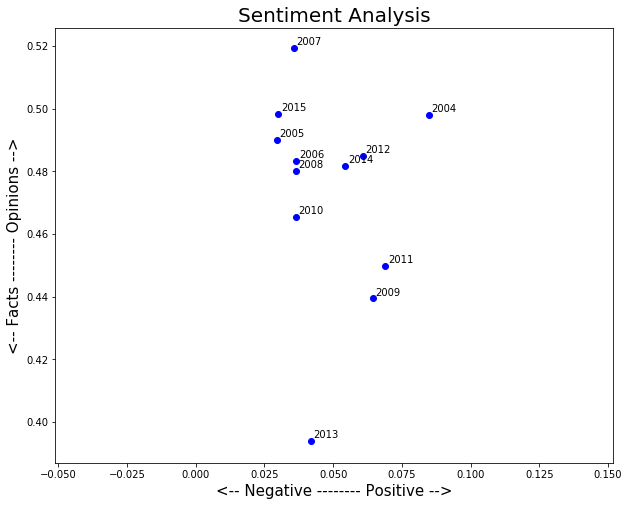

In [49]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, anio in enumerate(data.index):
    x = data.polarity.loc[anio]
    y = data.subjectivity.loc[anio]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-0.051, 0.152) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment Over Time

In [50]:
# Split each routine into 12 parts
import numpy as np
import math

def split_text(text, n=12):
    '''Takes in a string of text and splits into n equal parts, with a default of 12 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [51]:
# Let's take a look at our data again
data

,transcript,full_name,blob_en,polarity,subjectivity
2004,"Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácor...",2004,"(Y, e, s, t, e, r, d, a, y, , I, , f, i, n, i, s, h, e, d, , t, h, e, , f, i, r, s, t, , s, t, a, g, e, , o, f, , a, , f, i, c, t, i, o, n...",0.084720,0.498135
2005,"Nunca en la puta vida me hubiera imaginado que el diario, siempre plagado de maremotos y de incendios de discotecas, pudiera traer alguna vez una ...",2005,"(N, e, v, e, r, , i, n, , t, h, e, , f, u, c, k, i, n, g, , l, i, f, e, , w, o, u, l, d, , I, , h, a, v, e, , i, m, a, g, i, n, e, d, , t...",0.029469,0.490039
2006,"Más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros, o no firmados pero sí apro...",2006,"(A, b, o, u, t, , o, n, c, e, , a, , w, e, e, k, , I, , r, e, c, e, i, v, e, , e, m, a, i, l, s, , f, r, o, m, , r, e, a, d, e, r, s, , w...",0.036573,0.483450
2007,"Desde hace días la Nina quiere interactuar conmigo. Todavía es prematuro decir que intenta tener una relación estable, pero ya empiezo a oír los e...",2007,"(F, o, r, , d, a, y, s, , t, h, e, , N, i, n, a, , w, a, n, t, s, , t, o, , i, n, t, e, r, a, c, t, , w, i, t, h, , m, e, ., , I, t, , i...",0.035618,0.519334
2008,"De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi olfato reco...",2008,"(S, u, d, d, e, n, l, y, , I, , w, a, s, , i, n, , t, h, e, , h, o, m, e, , w, h, e, r, e, , I, , s, p, e, n, t, , m, y, , c, h, i, l, d...",0.036495,0.480186
2009,"Google ha lanzado esta semana Latitude, un servicio gratuito que permite ubicar -mediante el celular- a los contactos de la agenda que den su cons...",2009,"(G, o, o, g, l, e, , h, a, s, , l, a, u, n, c, h, e, d, , t, h, i, s, , w, e, e, k, , L, a, t, i, t, u, d, e, ,, , a, , f, r, e, e, , s, e...",0.064435,0.439484
2010,"Leo en la prensa económica que, entre las varias empresas que tienen pensado salir a bolsa este año, se encuentra Polaroid, y me sorprende leer el...",2010,"(I, , r, e, a, d, , i, n, , t, h, e, , e, c, o, n, o, m, i, c, , p, r, e, s, s, , t, h, a, t, ,, , a, m, o, n, g, , t, h, e, , v, a, r, i...",0.036415,0.465589
2011,"Esto pasó ayer: Chichita caminaba por una playa desierta, en Mar Azul, costa atlántica argentina, con su revista y su sombrilla, y unos chicos dij...",2011,"(T, h, i, s, , h, a, p, p, e, n, e, d, , y, e, s, t, e, r, d, a, y, :, , C, h, i, c, h, i, t, a, , w, a, s, , w, a, l, k, i, n, g, , a, l, o...",0.068999,0.449794
2012,"Escribo esto justo cuando el contador llega a dos mil. Por lo tanto, mantenemos el ritmo a pesar de los días de turrones y petardos. Mientras nace...",2012,"(I, , w, r, i, t, e, , t, h, i, s, , j, u, s, t, , w, h, e, n, , t, h, e, , c, o, u, n, t, e, r, , r, e, a, c, h, e, s, , t, w, o, , t, h...",0.060820,0.484888
2013,"Menos de once segundos antes, cuando el jugador argentino recibe el pase de un compañero, el reloj en México marca las trece horas, doce minutos y...",2013,"(L, e, s, s, , t, h, a, n, , e, l, e, v, e, n, , s, e, c, o, n, d, s, , b, e, f, o, r, e, ,, , w, h, e, n, , t, h, e, , A, r, g, e, n, t, i...",0.041896,0.393916


In [52]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.blob_en:#transcript:
    split = split_text(t,12)
    list_pieces.append(split)   
#list_pieces

In [53]:
# The list has n elements, one for each transcript
len(list_pieces)

12

In [54]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

12

In [55]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        #polarity_piece.append(TextBlob(p).translate(to="en").sentiment.polarity)
        polarity_piece.append(p.sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.07628538789253074,
  0.10690478119622503,
  0.18095238095238095,
  -0.006249999999999999,
  -0.20814732142857142,
  -0.014285714285714303,
  -0.016250000000000007,
  0.38625,
  0.0774739583333333,
  -0.24166666666666667,
  0.036111111111111115,
  0.09722222222222222],
 [0.03126823020589777,
  0.04328915619899225,
  -0.027958622685185182,
  -0.04813311688311688,
  0.02495659722222222,
  0.034440104166666666,
  0.19081439393939392,
  0.11607142857142858,
  -0.05098039215686273,
  0.1265151515151515,
  0.05159722222222222,
  -0.271875],
 [0.022933829117457415,
  0.09922050364758697,
  0.07039930555555556,
  0.04513888888888889,
  -0.03235294117647058,
  -0.06955128205128205,
  0.012500000000000004,
  -0.3125,
  -0.06111111111111111,
  0.006868489583333333,
  0.08958333333333335,
  0.06536458333333332],
 [0.018740102639296184,
  0.06862573757375737,
  -0.30909090909090914,
  -0.125,
  -0.10576923076923081,
  0.11388888888888887,
  0.07666666666666666,
  -0.15,
  0.07500000000000001,
  

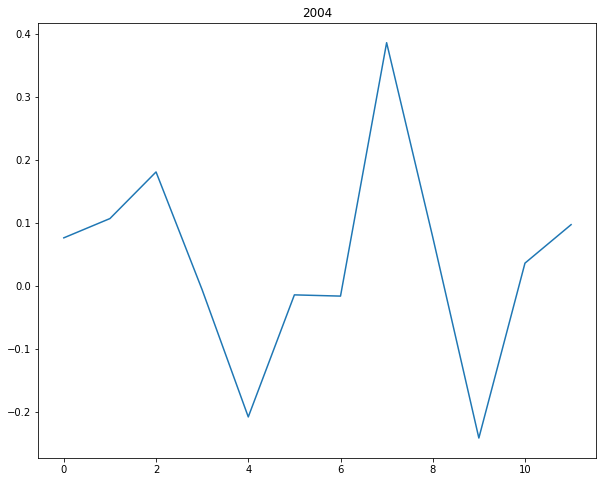

In [56]:
# Show the plot for one anio
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

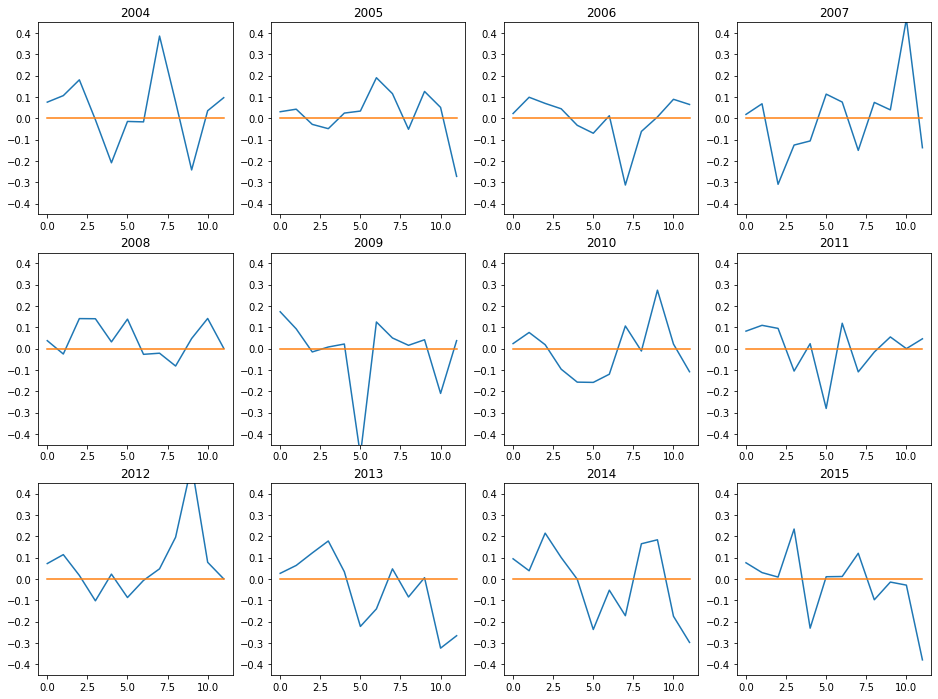

In [57]:
# Show the plot for all anios
plt.rcParams['figure.figsize'] = [16, 12]

for index, anio in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,12), np.zeros(12))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.45, ymax=.45)
    
plt.show()

# 6 - Modelado de Temáticas

Realizaremos diversos intentos para obtener los temas que predominan en los cuentos

In [58]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

,abajo,abananados,abandonaba,abandonado,abandonar,abandonaron,abandoné,abandonó,abanico,abaraja,...,últimos,única,únicamente,únicas,único,únicos,útero,útil,útiles,útimo
2004,10,0,1,1,0,0,0,0,0,0,...,2,3,4,0,11,0,0,3,0,1
2005,15,0,0,0,0,1,0,0,0,0,...,5,8,5,1,16,0,3,3,0,0
2006,4,0,0,0,0,0,0,0,0,0,...,7,8,12,1,13,1,0,2,0,0
2007,9,0,0,0,1,0,0,0,0,0,...,5,6,13,1,9,0,0,1,0,0
2008,9,0,0,0,0,1,0,1,0,0,...,7,17,11,5,15,0,0,5,0,0
2009,0,0,0,0,0,0,0,0,0,0,...,4,6,4,0,6,0,0,0,2,0
2010,8,0,0,0,2,0,0,0,0,0,...,11,9,5,1,9,0,0,2,0,0
2011,7,0,0,0,0,0,0,0,0,0,...,4,5,7,0,16,4,0,1,0,0
2012,8,0,1,0,0,0,0,0,0,1,...,2,1,5,1,7,1,0,1,0,0
2013,0,0,0,0,0,0,0,0,1,0,...,0,10,4,1,6,1,0,0,0,0


In [59]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [60]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
abajo,10,15,4,9,9,0,8,7,8,0,13,6
abananados,0,0,0,0,0,0,0,0,0,0,1,0
abandonaba,1,0,0,0,0,0,0,0,1,0,0,0
abandonado,1,0,0,0,0,0,0,0,0,0,0,0
abandonar,0,0,0,1,0,0,2,0,0,0,0,0


In [61]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [62]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [63]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.002*"mujer" + 0.002*"madre" + 0.002*"padre" + 0.001*"cabeza" + 0.001*"hombre" + 0.001*"escribir" + 0.001*"historia" + 0.001*"amigo" + 0.001*"verdad" + 0.001*"nombre"'),
 (1,
  '0.004*"revista" + 0.003*"orsai" + 0.003*"lector" + 0.002*"argentina" + 0.002*"historia" + 0.002*"blog" + 0.001*"punto" + 0.001*"madre" + 0.001*"cabeza" + 0.001*"buenos"')]

In [64]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.002*"mujer" + 0.002*"blog" + 0.002*"madre" + 0.002*"cabeza" + 0.002*"hija" + 0.002*"historia" + 0.001*"lector" + 0.001*"argentina" + 0.001*"padre" + 0.001*"mundial"'),
 (1,
  '0.006*"revista" + 0.004*"orsai" + 0.004*"lector" + 0.002*"texto" + 0.002*"historia" + 0.001*"escribir" + 0.001*"madre" + 0.001*"además" + 0.001*"página" + 0.001*"buenos"'),
 (2,
  '0.003*"orsai" + 0.003*"revista" + 0.002*"lector" + 0.002*"argentino" + 0.002*"hombre" + 0.002*"mujer" + 0.002*"argentina" + 0.001*"papelito" + 0.001*"madre" + 0.001*"historia"')]

In [65]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.000*"revista" + 0.000*"orsai" + 0.000*"madre" + 0.000*"hombre" + 0.000*"mujer" + 0.000*"argentina" + 0.000*"amigos" + 0.000*"cabeza" + 0.000*"lector" + 0.000*"final"'),
 (1,
  '0.003*"revista" + 0.002*"orsai" + 0.002*"lector" + 0.002*"blog" + 0.002*"argentina" + 0.002*"historia" + 0.002*"mujer" + 0.002*"cabeza" + 0.001*"madre" + 0.001*"escribir"'),
 (2,
  '0.003*"revista" + 0.003*"orsai" + 0.003*"lector" + 0.002*"madre" + 0.002*"mujer" + 0.002*"hombre" + 0.002*"texto" + 0.002*"historia" + 0.002*"cabeza" + 0.001*"verdad"'),
 (3,
  '0.000*"lector" + 0.000*"revista" + 0.000*"orsai" + 0.000*"historia" + 0.000*"cabeza" + 0.000*"saber" + 0.000*"mujer" + 0.000*"punto" + 0.000*"madre" + 0.000*"escribir"')]

## Intento 2: sólo Sustantivos

In [66]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text,language='spanish')
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [67]:
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
2004,ayer di por finalizada la primera etapa de un experimento de ficción llamado más respeto que soy tu madre en el que usé el recurso de la bitácora ...
2005,nunca en la puta vida me hubiera imaginado que el diario siempre plagado de maremotos y de incendios de discotecas pudiera traer alguna vez una bu...
2006,más o menos una vez por semana recibo correos de lector que me informan que han visto texto míos firmados por otros o no firmados pero sí apropiad...
2007,desde hace días la nina quiere interactuar conmigo todavía es prematuro decir que intenta tener una relación estable pero ya empiezo a oír los eng...
2008,de pronto yo estaba en el hogar donde pasé la infancia lo supo primero mi nariz los ojos se acostumbran tarde a la penumbra pero mi olfato reconoc...
2009,google ha lanzado esta semana latitude un servicio gratuito que permite ubicar mediante el celular a los contactos de la agenda que den su consent...
2010,leo en la prensa económica que entre las varias empresas que tienen pensado salir a bolsa este año se encuentra polaroid y me sorprende leer el no...
2011,esto pasó ayer chichita caminaba por una playa desierta en mar azul costa atlántica argentina con su revista y su sombrilla y unos chicos dijeron ...
2012,escribo esto justo cuando el contador llega a dos mil por lo tanto mantenemos el ritmo a pesar de los días de turrones y petardos mientras nace el...
2013,menos de once segundos antes cuando el jugador argentino recibe el pase de un compañero el reloj en méxico marca las trece horas doce minutos y ve...


In [68]:
colname=[]
list_pieces = []
contador=0
for t in data_clean.transcript:
    split = split_text(t,posts_per_year[contador]-7)
    subcont=0
    for p in split:
        list_pieces.append(p)
        colname.append(str(2004+contador)+ "-" + str(subcont))
        subcont=subcont+1
    contador=contador+1
len(list_pieces)

302

In [69]:
data_split = pd.DataFrame(data=list_pieces).transpose()
data_split.columns=colname
data_split2=data_split.transpose()
data_split2.columns = ['transcript']
data_split2

,transcript
2004-0,ayer di por finalizada la primera etapa de un experimento de ficción llamado más respeto que soy tu madre en el que usé el recurso de la bitácora ...
2004-1,da y me los fumaba tocaba la morenita va a la acequia en un acordeón me gustaba oler el papel de la colección robin hood me parecía que la saga de...
2004-2,y watson debieron usar armas de fuego para resolver uno de sus casos me parecieron ambos tan falsos como la segunda época de tom y jerry cuando u...
2004-3,or la noche durante muchas noches pero tampoco podría dejar de leer otra de sus historias y después otra y después otra hasta que una tarde me ver...
2004-4,ón a buenos aires a veces me pregunto si mirta refugiada en los brazos de su esposo en algún lugar del sur argentino imaginará que muchos de sus a...
...,...
2015-10,que el pobre conferencista y que tendré que dar mis impresiones sobre el futuro del libro durante una hora y escuchar las toses y los carraspeos d...
2015-11,tengo pasado ni futuro nunca sé exactamente en qué año estoy ni si acabo de despertar en mi casa de buenos aires o en la de barcelona ni si estoy ...
2015-12,leyendo por la mitad me agarró un ataque de llanto con hipos y con pucheros y no pude dejar de llorar durante un rato yo sabía mientras lloraba q...
2015-13,su correo que para sorpresa de ambas madre e hija alejandra y nery vimos a basdala el pasado fin de semana en un centro comercial vivito y colean...


In [73]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_split2.transcript.apply(nouns))
data_nouns

[nltk_data] Downloading package punkt to
[nltk_data]     /home/administrador/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/administrador/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,transcript
2004-0,ayer di por finalizada la primera etapa respeto que soy tu madre el recurso herramienta cronológica internet para contar historia costumbrista des...
2004-1,da y tocaba la la acequia el papel robin holmes la literatura mundo y que sir arthur conan doyle era el escritor cuando después leí mundo además c...
2004-2,y watson debieron armas para resolver tan falsos como la jerry cuando moñito y ya los dibujante sino tipo que trazaba más modernas astuto que podí...
2004-3,durante muchas noches podría dejar hasta que arrancar la primera hoja blanco del cuaderno también tendría que echar luz sobre mis miedos y mis sue...
2004-4,buenos veces si mirta refugiada brazos sur argentino imaginará que virtuales por muerta y ella que con gran dolor debió elegir entre luna íntima i...
...,...
2015-10,que el pobre conferencista y que tendré que dar mis impresiones futuro del libro durante hora y escuchar las carraspeos oyentes minuto quince y te...
2015-11,tengo pasado futuro nunca sé exactamente qué año estoy acabo aires era flaco o era gordo si tengo dinero pantalón que pies hija o ya con sus novio...
2015-12,leyendo por la ataque con hipos y con pucheros pude dejar durante rato yo sabía mientras era patética grandote moqueando monitor es peor que grand...
2015-13,su correo que sorpresa basdala el pasado fin vivito y coleando mí la culpa ella creía broma pesada primero pensé inmenso malentendido quizá hubier...


In [74]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

with open('spanish.txt') as f:
    stop_words = f.read().splitlines()
for pal in add_stop_words:
    stop_words.append(pal)
for pal in more_stop_words:
    stop_words.append(pal)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,abajo,abananados,abandonaba,abandonado,abandoné,abandonó,abaratar,abarcaba,abarcar,abastecer,...,último,últimos,única,únicamente,únicas,único,únicos,útero,útil,útiles
2004-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2004-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-11,0,0,0,0,1,0,0,0,0,0,...,3,0,1,0,0,0,0,0,0,0
2015-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-13,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [75]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [76]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.003*"lector" + 0.003*"revista" + 0.003*"blog" + 0.002*"madre" + 0.002*"fin" + 0.002*"cabeza" + 0.002*"historia" + 0.002*"hombre" + 0.001*"padre" + 0.001*"saber"'),
 (1,
  '0.003*"lector" + 0.002*"revista" + 0.002*"hombre" + 0.002*"argentino" + 0.002*"hija" + 0.002*"idea" + 0.002*"bar" + 0.001*"texto" + 0.001*"país" + 0.001*"cabeza"')]

In [77]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.006*"lector" + 0.005*"revista" + 0.003*"autor" + 0.003*"blog" + 0.002*"texto" + 0.002*"idea" + 0.002*"cuento" + 0.002*"orsai" + 0.002*"argentino" + 0.002*"aires"'),
 (1,
  '0.002*"cabeza" + 0.002*"padre" + 0.002*"amigo" + 0.002*"hombre" + 0.002*"fútbol" + 0.002*"fin" + 0.002*"tampoco" + 0.002*"mujer" + 0.001*"cambio" + 0.001*"creo"'),
 (2,
  '0.002*"hombre" + 0.002*"blog" + 0.002*"madre" + 0.002*"hija" + 0.002*"padre" + 0.002*"argentino" + 0.002*"lector" + 0.002*"sabe" + 0.002*"hijo" + 0.002*"cabeza"')]

In [78]:
# Let's try topics = 4
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.003*"revista" + 0.003*"lector" + 0.003*"argentino" + 0.003*"hombre" + 0.002*"blog" + 0.002*"fútbol" + 0.002*"idea" + 0.002*"cabeza" + 0.002*"mujer" + 0.002*"partido"'),
 (1,
  '0.002*"hija" + 0.002*"creo" + 0.002*"cabeza" + 0.002*"historia" + 0.002*"fin" + 0.002*"hijo" + 0.001*"ahí" + 0.001*"padre" + 0.001*"sabe" + 0.001*"cuenta"'),
 (2,
  '0.006*"lector" + 0.004*"revista" + 0.004*"blog" + 0.002*"texto" + 0.002*"madre" + 0.002*"autor" + 0.002*"orsai" + 0.002*"aires" + 0.002*"cuento" + 0.002*"escribir"'),
 (3,
  '0.002*"lector" + 0.002*"padre" + 0.002*"pueblo" + 0.002*"hombre" + 0.002*"saber" + 0.002*"bar" + 0.002*"papelito" + 0.002*"cabeza" + 0.002*"autor" + 0.001*"fin"')]

## Intento 3: Sustantivos y adjetivos

In [79]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text,language='spanish')
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [80]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_split2.transcript.apply(nouns_adj)) #data_clean
data_nouns_adj

,transcript
2004-0,ayer di por finalizada la primera etapa un respeto que soy tu madre que usé el recurso una herramienta cronológica internet para contar una histor...
2004-1,da y fumaba tocaba la la acequia un oler el papel robin que holmes la mejor literatura mundo y que sir arthur conan doyle era el mejor escritor cu...
2004-2,y watson debieron usar armas para resolver ambos tan falsos como la jerry cuando usaban moñito y cuando ya los el dibujante sino un tipo que traza...
2004-3,noche durante muchas noches tampoco podría dejar hasta que una arrancar la primera hoja blanco del cuaderno también tendría que echar luz sobre mi...
2004-4,buenos veces si mirta refugiada los brazos sur argentino imaginará que virtuales dan por muerta y ella que con gran dolor debió elegir entre una l...
...,...
2015-10,que el pobre conferencista y que tendré que dar mis impresiones el futuro del libro durante una hora y escuchar las y los carraspeos oyentes el mi...
2015-11,tengo pasado ni futuro nunca sé exactamente qué año estoy ni si acabo aires en era flaco o era gordo ni si tengo dinero pantalón que los pies hija...
2015-12,leyendo por la un ataque con hipos y con pucheros pude dejar durante un rato yo sabía mientras que era patética un gordo grandote moqueando un mon...
2015-13,su correo que para sorpresa basdala el pasado fin comercial vivito y coleando mí la culpa que ella creía una broma pesada primero pensé un inmenso...


In [81]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,abajo,abananados,abandonaba,abandonado,abandonar,abandoné,abandonó,abaraja,abaratar,abarcaba,...,último,últimos,única,únicamente,únicas,único,únicos,útero,útil,útiles
2004-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2004-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-11,0,0,0,0,0,1,0,0,0,0,...,3,0,1,0,0,0,0,0,0,0
2015-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-13,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [82]:
#data_dtmna['escritor']
print(data_dtmna.shape)
#print(cvna.get_feature_names())

(302, 24605)


In [83]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [84]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.002*"hombre" + 0.002*"padre" + 0.002*"cabeza" + 0.001*"cualquier" + 0.001*"amigo" + 0.001*"cara" + 0.001*"segundo" + 0.001*"mujer" + 0.001*"madre" + 0.001*"final"'),
 (1,
  '0.004*"lector" + 0.004*"revista" + 0.002*"blog" + 0.002*"texto" + 0.002*"autor" + 0.002*"argentino" + 0.002*"orsai" + 0.002*"final" + 0.002*"mundial" + 0.001*"saber"')]

In [85]:
# Let's start with 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.005*"revista" + 0.004*"lector" + 0.002*"autor" + 0.002*"blog" + 0.002*"texto" + 0.002*"orsai" + 0.002*"bar" + 0.002*"padre" + 0.002*"idea" + 0.002*"historia"'),
 (1,
  '0.002*"lector" + 0.002*"hija" + 0.002*"fútbol" + 0.002*"mundial" + 0.002*"hombre" + 0.002*"blog" + 0.002*"cabeza" + 0.001*"perro" + 0.001*"punto" + 0.001*"final"'),
 (2,
  '0.003*"lector" + 0.002*"hombre" + 0.002*"blog" + 0.002*"revista" + 0.002*"argentino" + 0.002*"cualquier" + 0.002*"final" + 0.001*"cabeza" + 0.001*"sabe" + 0.001*"amigo"')]

In [86]:
# Probamos a modelar con 4 tópicos
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.003*"lector" + 0.002*"revista" + 0.002*"mundial" + 0.002*"cabeza" + 0.002*"creo" + 0.002*"final" + 0.001*"idea" + 0.001*"amigo" + 0.001*"texto" + 0.001*"cualquier"'),
 (1,
  '0.004*"lector" + 0.003*"revista" + 0.002*"padre" + 0.002*"blog" + 0.002*"madre" + 0.002*"hijo" + 0.002*"final" + 0.001*"nombre" + 0.001*"país" + 0.001*"hija"'),
 (2,
  '0.003*"lector" + 0.003*"revista" + 0.002*"blog" + 0.002*"texto" + 0.002*"orsai" + 0.002*"autor" + 0.002*"bar" + 0.002*"cuento" + 0.002*"aires" + 0.002*"hija"'),
 (3,
  '0.003*"hombre" + 0.002*"mundial" + 0.002*"cabeza" + 0.002*"fútbol" + 0.001*"lector" + 0.001*"argentino" + 0.001*"blog" + 0.001*"gordo" + 0.001*"padre" + 0.001*"mujer"')]

## Identificar los temas

In [87]:
# Our final LDA model
QTY_TOPICS=4
ldana = models.LdaModel(corpus=corpusna, num_topics=QTY_TOPICS, id2word=id2wordna, passes=40,
                        random_state=15)
ldana.print_topics(QTY_TOPICS,5)

[(0,
  '0.004*"revista" + 0.004*"lector" + 0.002*"idea" + 0.002*"papelito" + 0.002*"final"'),
 (1,
  '0.003*"hombre" + 0.003*"mundial" + 0.002*"fútbol" + 0.002*"argentino" + 0.002*"amigo"'),
 (2,
  '0.004*"lector" + 0.003*"revista" + 0.002*"blog" + 0.002*"texto" + 0.002*"autor"'),
 (3,
  '0.003*"revista" + 0.002*"lector" + 0.002*"mujer" + 0.002*"texto" + 0.001*"cabeza"')]

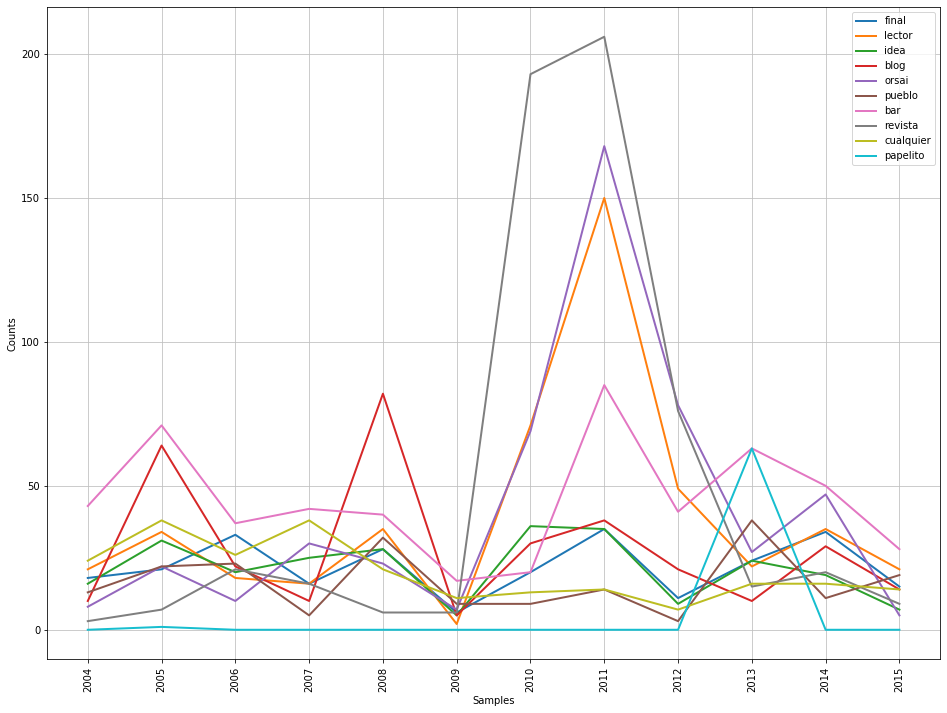

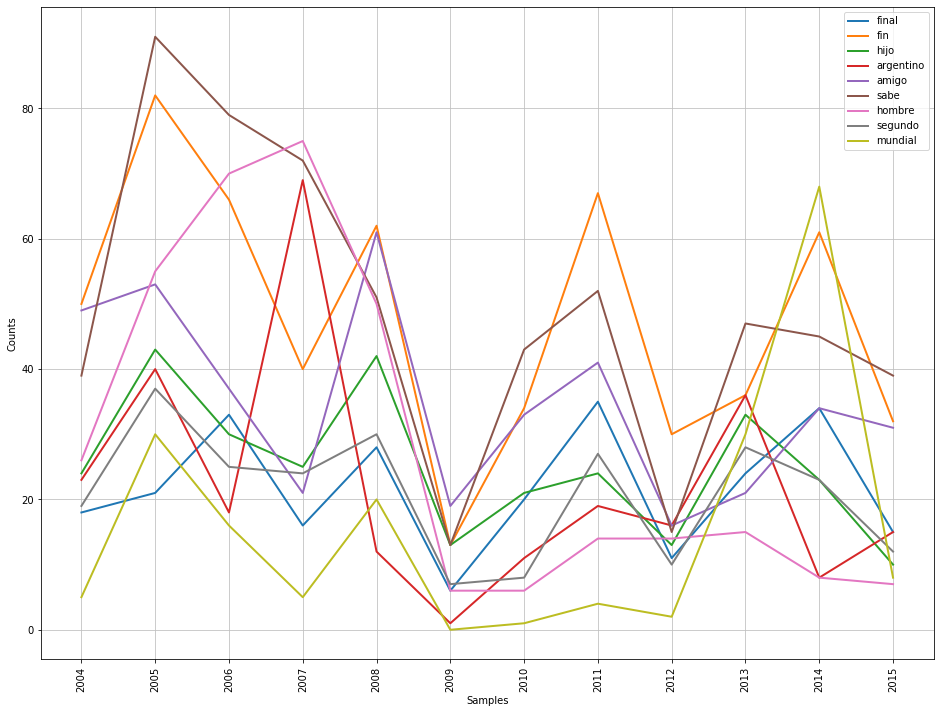

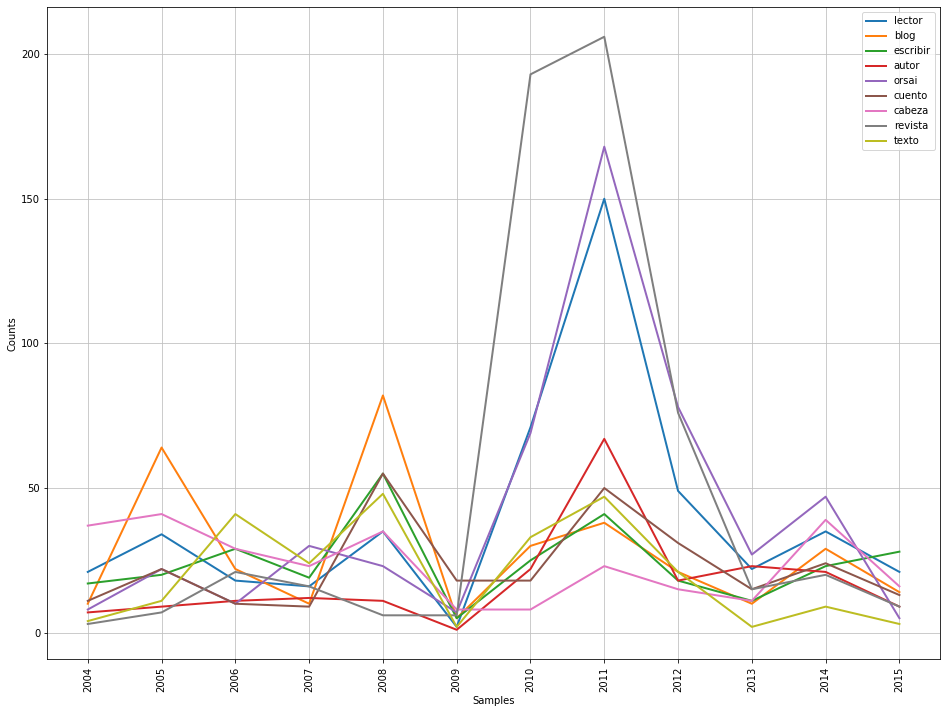

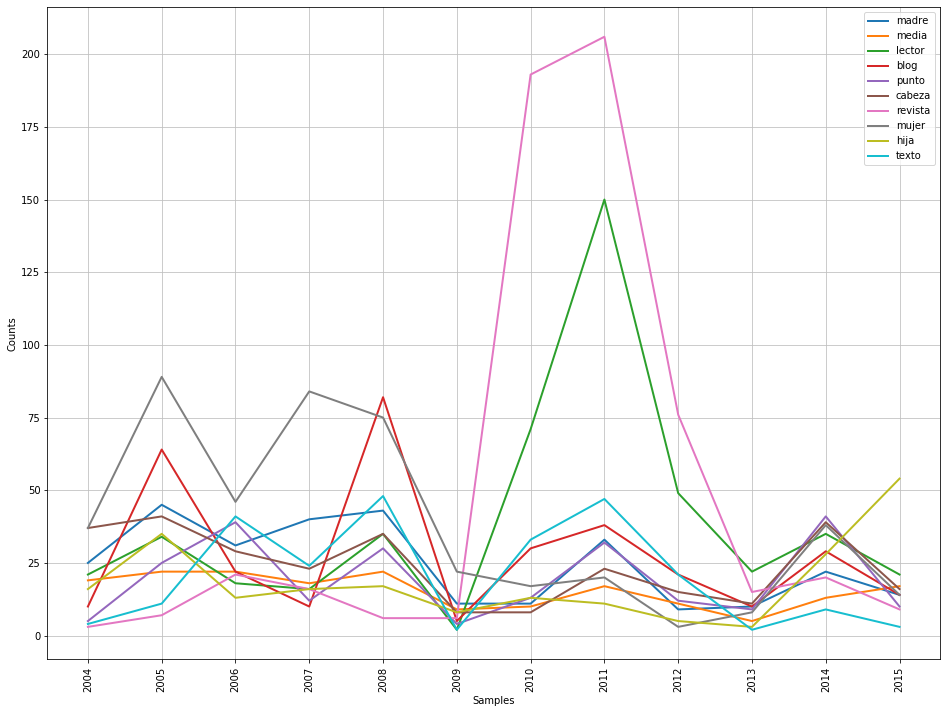

In [89]:
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/home/administrador/git/python/tp_ds_up_01/blog/' 
wordlists = PlaintextCorpusReader(corpus_root, '.*', encoding='latin-1')
#wordlists.fileids()
#pals = wordlists.words('2004.txt')
for i in range(QTY_TOPICS):
    theList=ldana.get_topic_terms(i)

    cfd = nltk.ConditionalFreqDist(
        (word,genre)
        for genre in anios
        for w in wordlists.words(genre + '.txt')
        for word in [id2wordna.get(a) for (a,b) in theList]
        if w.lower().startswith(word) )
    cfd.plot()

In [90]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

ValueError: too many values to unpack (expected 1)

Esto es lo que descubrimos: <br>
TEMA 0- Personas [2004,2009]<br>
TEMA 1- Medios de comunicación [2008,2010,2011,2012,2015]<br>
TEMA 2- Casciari [2005,2007]<br> 
TEMA 3- Niñez / Infancia [2006,2013]<br>

In [91]:
#Info de Wikipedia
casciariTL = {2004:'blog gorda en españa. Nace su hija Nina.',
             2005:'premio alemania Deutsche Welle El mejor blog del mundo blog Más respeto, que soy tu madre ',
             2006:'Editorial Sudamericana publico en la Argentina y publica Diario de una mujer gorda',
             2007:'publicó su segundo libro, España deci alpiste. Colabora El PAis y La Nación',
             2008:'Gasalla se interesa por la obra teatro. ',
             2009:'se estrena en teatro. Le dió fama y mejora economica. Libro El pibe que arruinaba las fotos',
             2010:'renuncia a periódicos y funda Revista Orsai junto a Chiri, amigo de la infancia',
             2011:'Aparece primera edición de Orsai. Publica Charlas con mi hemisferio derecho',
             2012:'Inicia leyendo cuentos en radio Vorterix, por 2 años',
             2013:'Finaliza primera edicion Orsai',
             2014:'Edito revista tb para niños Bonsai',
             2015:'Publica El nuevo paraíso de los tontos. Se separa de su mujer. Sufre infarto y vuelve a la Argentina'}


In [92]:
casciariTL

{2004: 'blog gorda en españa. Nace su hija Nina.',
 2005: 'premio alemania Deutsche Welle El mejor blog del mundo blog Más respeto, que soy tu madre ',
 2006: 'Editorial Sudamericana publico en la Argentina y publica Diario de una mujer gorda',
 2007: 'publicó su segundo libro, España deci alpiste. Colabora El PAis y La Nación',
 2008: 'Gasalla se interesa por la obra teatro. ',
 2009: 'se estrena en teatro. Le dió fama y mejora economica. Libro El pibe que arruinaba las fotos',
 2010: 'renuncia a periódicos y funda Revista Orsai junto a Chiri, amigo de la infancia',
 2011: 'Aparece primera edición de Orsai. Publica Charlas con mi hemisferio derecho',
 2012: 'Inicia leyendo cuentos en radio Vorterix, por 2 años',
 2013: 'Finaliza primera edicion Orsai',
 2014: 'Edito revista tb para niños Bonsai',
 2015: 'Publica El nuevo paraíso de los tontos. Se separa de su mujer. Sufre infarto y vuelve a la Argentina'}

# Conclusiones ¿Finales?

Y ahora... con toda la info obtenida, las gráficas y el TimeLine real de la Vida de Hernan Casciari, a sacar conclusiones! Revisa el artículo sobre NLP en el blog: www.aprendemachinelearning.com 